## Visual story telling part 2: Capital Metro data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
capmetro_df=pd.read_csv(r'C:\Users\there\Github_repo\TS_STA380\data\capmetro_UT.csv')
capmetro_df.describe().T

,count,mean,std,min,25%,50%,75%,max
boarding,5824.0,51.511676,48.820284,0.00,13.000,33.00,79.25,288.00
alighting,5824.0,47.646291,50.069866,0.00,13.000,28.00,64.00,304.00
temperature,5824.0,69.282473,13.540249,29.18,59.195,72.75,79.29,97.64
hour_of_day,5824.0,13.500000,4.610168,6.00,9.750,13.50,17.25,21.00


In [4]:
capmetro_df['timestamp']=pd.to_datetime(capmetro_df['timestamp'])
capmetro_df['time'] = capmetro_df['timestamp'].dt.time
capmetro_df['hour'] = pd.to_datetime(capmetro_df['time'], format='%H:%M:%S').dt.hour
capmetro_df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,time,hour
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,06:00:00,6
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,06:15:00,6
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend,06:30:00,6
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend,06:45:00,6
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend,07:00:00,7


Text(0.5, 1.0, 'Weekly Trends in Boardings and Alightings')

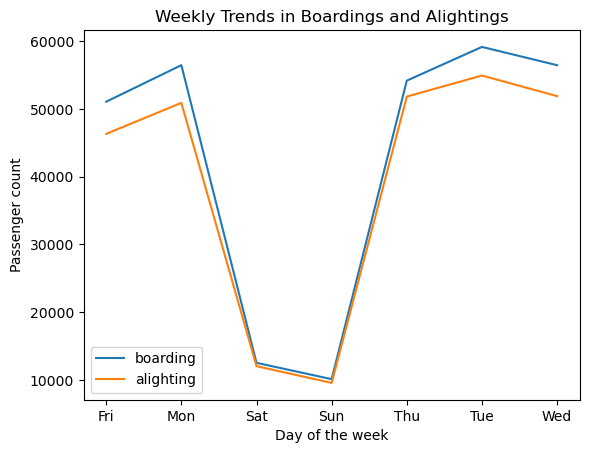

In [6]:
capmetro_df.groupby('day_of_week')[['boarding','alighting']].sum().plot()
plt.xlabel('Day of the week')
plt.ylabel('Passenger count')
plt.title('Weekly Trends in Boardings and Alightings')

#### We see that there is a drop in cap metro usage during the weekends probably because there are no classes during the weekends

Text(0.5, 1.0, 'Monthly Trends in Boardings and Alightings')

<Figure size 800x400 with 0 Axes>

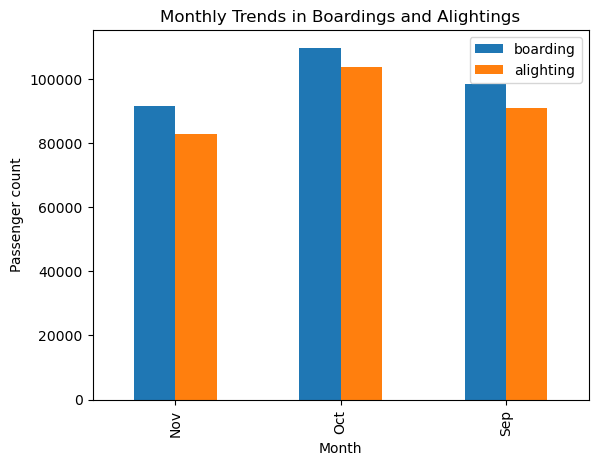

In [8]:
plt.figure(figsize=(8, 4))
capmetro_df.groupby('month')[['boarding','alighting']].sum().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Passenger count')
plt.title('Monthly Trends in Boardings and Alightings')

#### We see that there is a drop in cap metro usage in November probably due to the thanksgiving holidays from UT where students are not coming to campus

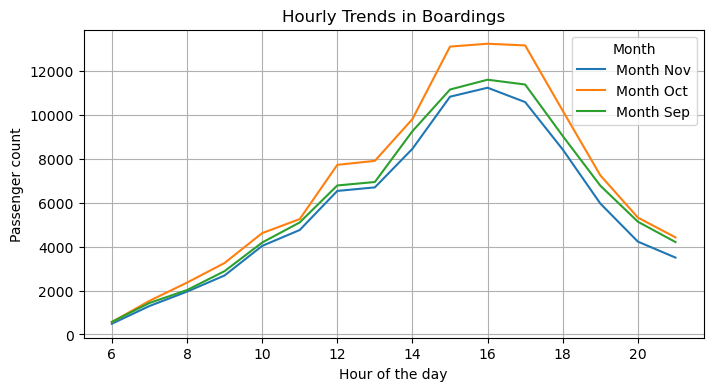

In [9]:
grouped=capmetro_df.groupby(['hour','month'])[['boarding']].sum().unstack()

plt.figure(figsize=(8, 4))
for month in grouped.columns.levels[1]:
    plt.plot(grouped.index, grouped[('boarding', month)], label=f'Month {month}')

plt.xlabel('Hour of the day')
plt.ylabel('Passenger count')
plt.title('Hourly Trends in Boardings')
plt.legend(title='Month')
plt.grid(True)
plt.show()


C:\Users\there\AppData\Local\Temp\ipykernel_14984\3937300403.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour_of_day', y='temperature', data=capmetro_df, ci=None, marker='o')


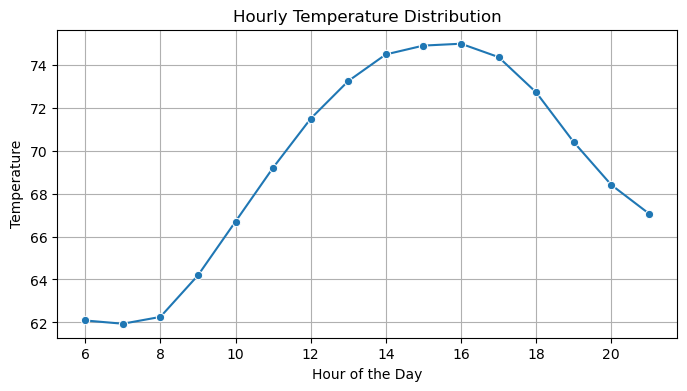

In [10]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='hour_of_day', y='temperature', data=capmetro_df, ci=None, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature')
plt.title('Hourly Temperature Distribution')
plt.grid(True)
plt.show()

#### Comparing the hourly boarding trend and the hourly temperature distribution we can that students board cap metro the most in the afternoon which is also the time of the day when it is the hottest

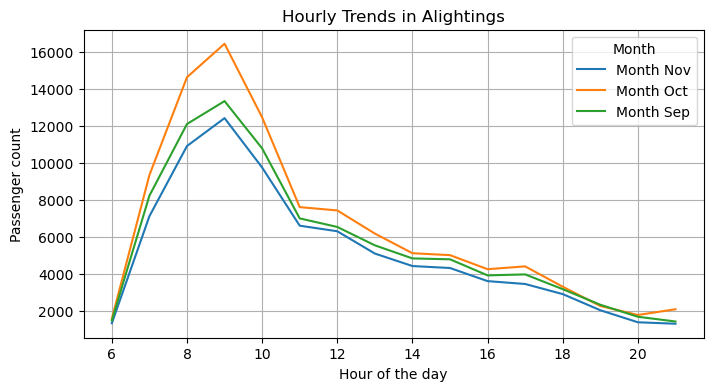

In [11]:
grouped=capmetro_df.groupby(['hour','month'])[['alighting']].sum().unstack()

plt.figure(figsize=(8, 4))
for month in grouped.columns.levels[1]:
    plt.plot(grouped.index, grouped[('alighting', month)], label=f'Month {month}')

plt.xlabel('Hour of the day')
plt.ylabel('Passenger count')
plt.title('Hourly Trends in Alightings')
plt.legend(title='Month')
plt.grid(True)
plt.show()

#### We can see from the hourly trends in alightings that the peak is in the morning when the classes start as students make their way to class

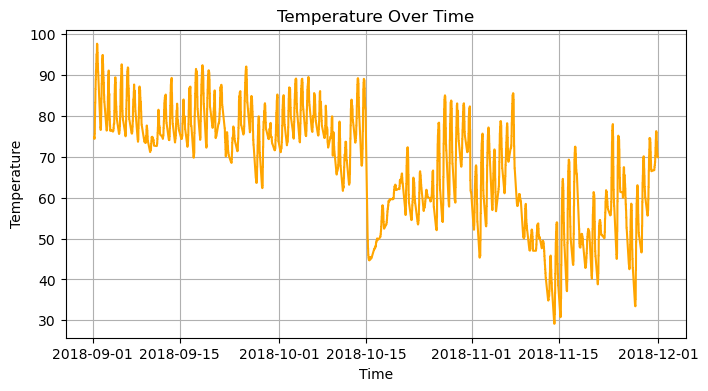

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(capmetro_df['timestamp'], capmetro_df['temperature'], label='Temperature', color='orange')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.grid(True)
plt.show()

#### We can see that the temperature drops towards December

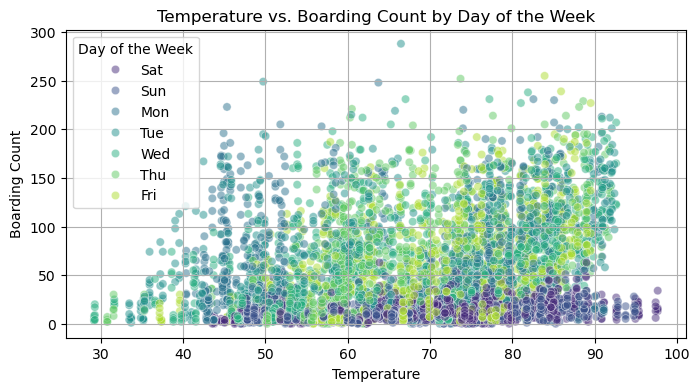

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='temperature', y='boarding', hue='day_of_week', data=capmetro_df, palette='viridis', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Boarding Count')
plt.title('Temperature vs. Boarding Count by Day of the Week')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

#### We can see that as the temperature increases the boarding increases during the weekdays

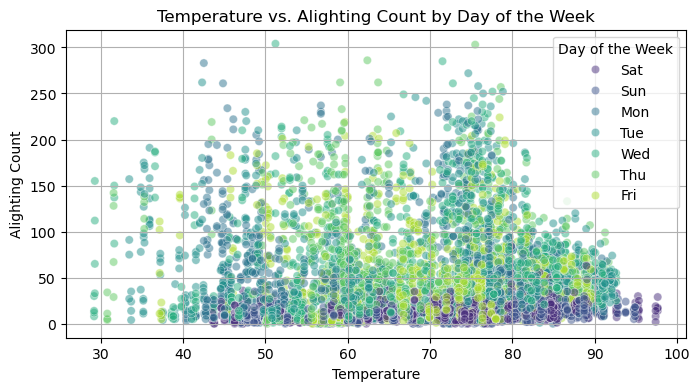

In [14]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='temperature', y='alighting', hue='day_of_week', data=capmetro_df, palette='viridis', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Alighting Count')
plt.title('Temperature vs. Alighting Count by Day of the Week')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

#### We can see that as the temperature increases the alighting increases during the weekdays